In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Position_Salaries.csv')

In [4]:
df.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1:].values

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [8]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [9]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [10]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [11]:
from sklearn.svm import SVR

In [12]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/Users/sammy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [13]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [14]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

ValueError: Expected 2D array, got 1D array instead:
array=[-0.27861589].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1)

array([[-0.27861589]])

In [19]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

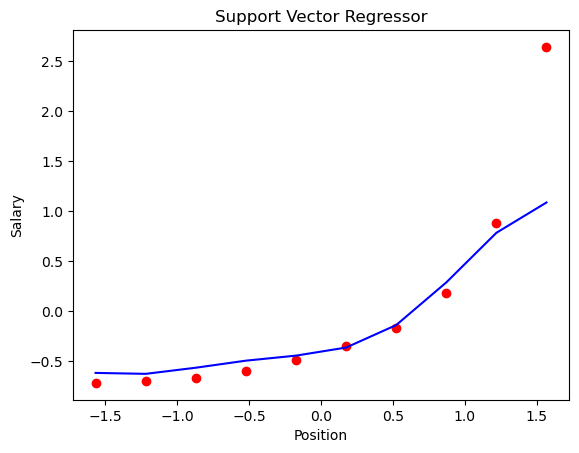

In [24]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Support Vector Regressor')
plt.show()

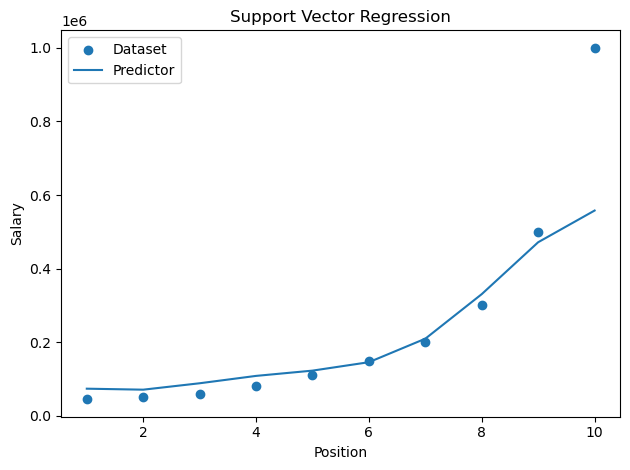

In [27]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), label='Dataset')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), label='Predictor')
plt.title('Support Vector Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
X_grid =